In [1]:
import openpiv.tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from skimage import img_as_int
import cmocean as cmo
from scipy.interpolate import griddata

/home/kramosmu/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to int16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


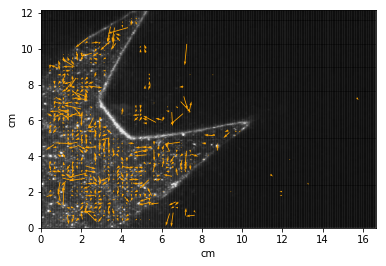

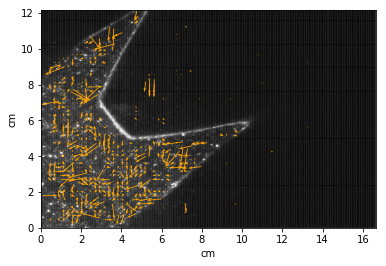

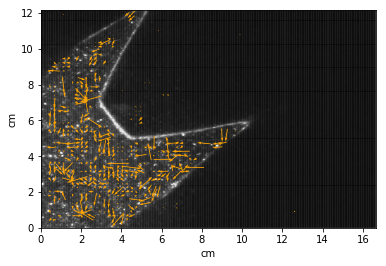

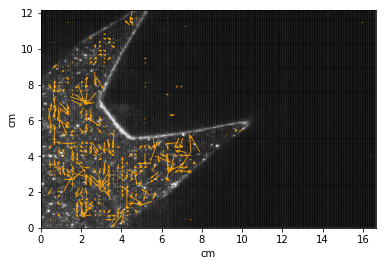

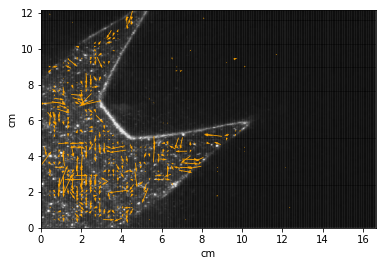

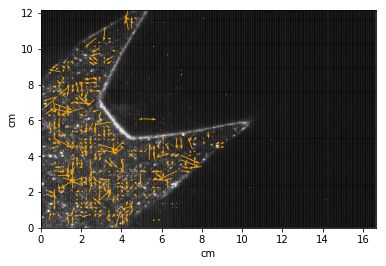

In [ ]:
frame_a1  = openpiv.tools.imread( '../exp_18jun19/frames/run02_0001.jpg' )
frame_a1_int = img_as_int(1-frame_a1)
frame_crop = frame_a1_int[200:,500:1700].astype(np.int32)

for num in range(1,100,8):
    fig,ax = plt.subplots(1,1)
    num_st = ('%04d' %num)
    filename = ('../exp_18jun19/velocity/run02_%s.txt' %num_st)
    df = pd.read_csv(filename,delim_whitespace=True, header=None, names=['x','y','u','v','bla'])
    U = np.array(df['u'])
    V = np.array(df['v'])
    X = np.array(df['x'])
    Y = np.array(df['y'])

    spd = np.sqrt(U**2+V**2)
    spd_masked = np.ma.masked_greater(spd,0.2)
    mask = np.ma.getmask(spd_masked)
    UU = np.ma.masked_array(U, mask=mask)
    VV = np.ma.masked_array(V, mask=mask)
    XX = np.ma.masked_array(X, mask=mask)
    YY = np.ma.masked_array(Y, mask=mask)

    Xfr = np.linspace(0,np.max(X),np.shape(frame_crop)[1])
    Yfr = np.linspace(0,np.max(Y),np.shape(frame_crop)[0])
    
    ax.pcolormesh(Xfr,Yfr,np.flipud(frame_crop), cmap='gray_r', alpha=0.1)
    ax.quiver(XX, YY, UU, VV, pivot='mid', color='orange',scale=3)

    ax.set_xlabel('cm')
    ax.set_ylabel('cm')

In [3]:
4/30

0.13333333333333333

In [5]:
2/30

0.06666666666666667